In [111]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of plot we will create
#df denoted as dataframe
#pd as pandas
df = pd.read_csv(r'C:\Users\Parth Patel\Downloads\archive (2)\movies.csv')
    

In [91]:
# Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [112]:
#Check if there is any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [113]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [114]:
#change data type of columns
df['released']= df['released'].fillna('Unknown')
num_cols = ['score', 'votes', 'budget', 'gross', 'runtime']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

text_cols = ['name','genre','director','writer','star','country','company','rating']
for col in text_cols:
    df[col] = df[col].fillna('Unknown')



df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')



In [115]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [116]:
df['released'].str.contains("United States",na = False).sum()

df['released_clean'] = df['released'].str.split('(').str[0].str.strip()
df['released'],df['released_clean']
df['released_clean'] = pd.to_datetime(df['released_clean'], errors='coerce')
df['yearcorrect'] = df['released_clean'].dt.year.astype('Int64')


In [118]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [ ]:

#Budget High correlation
#Comapany High Correlation
#Director Highh Correlation

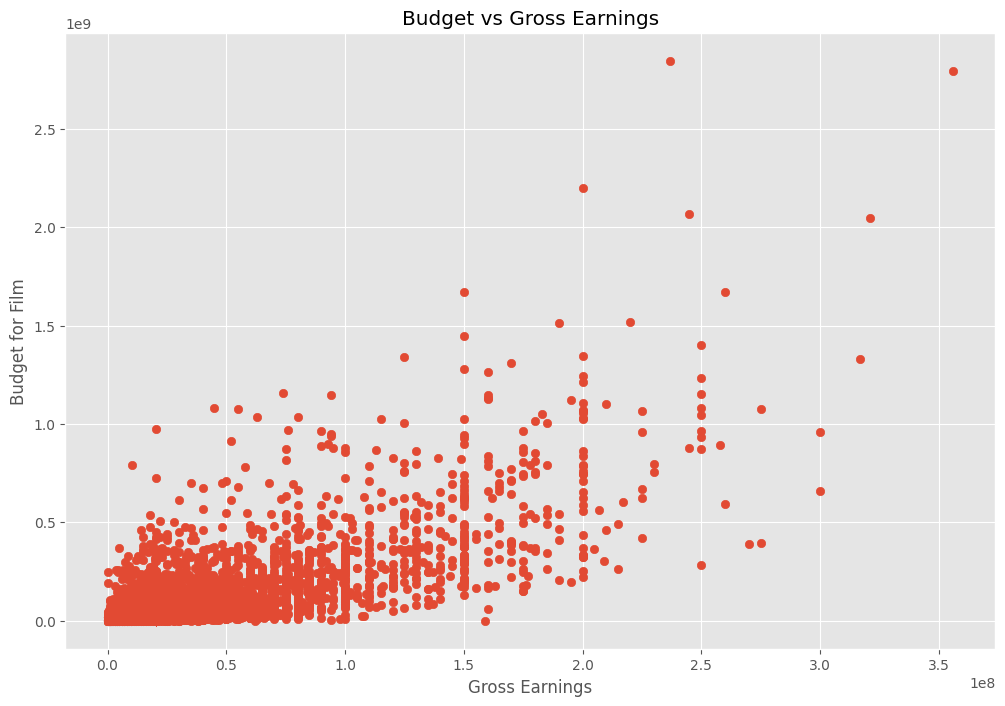

In [119]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

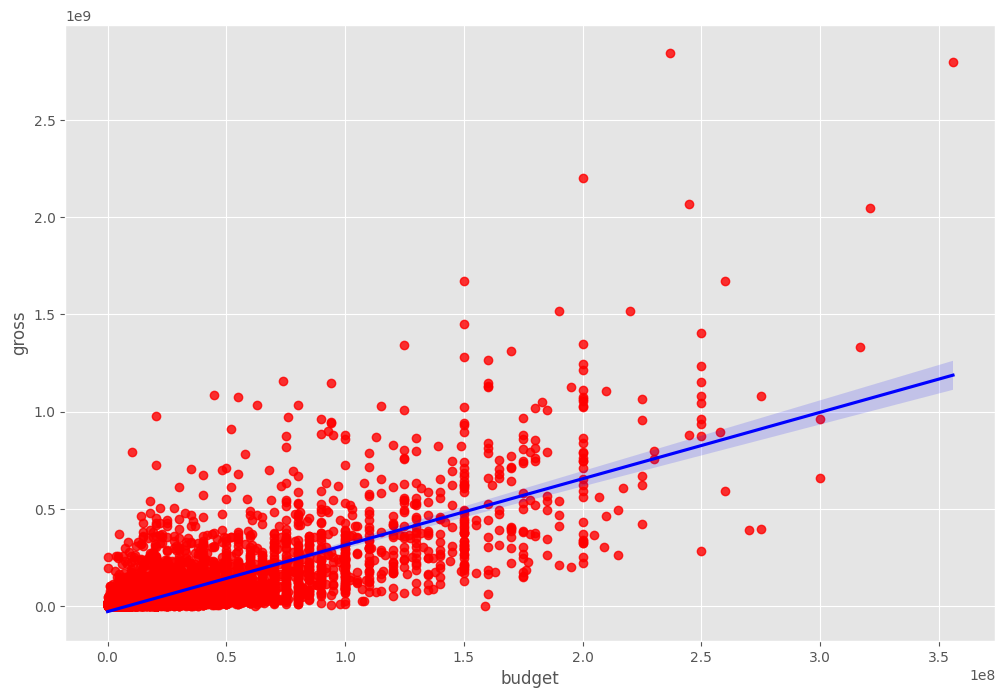

In [64]:
#plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [83]:
df_numeric = df.select_dtypes(include=['number'])  # used df_numeric due to VScode considering all the non numeric and throwing erro
#methods :  Bydefault: pearson , kendall, spearman
df_numeric.corr()


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.098013,0.222573,0.291690,0.259504,0.120662,0.997596
score,0.098013,1.000000,0.409157,0.061931,0.185563,0.399407,0.108201
votes,0.222573,0.409157,1.000000,0.460968,0.632120,0.309151,0.215727
budget,0.291690,0.061931,0.460968,1.000000,0.745881,0.273371,0.282922
gross,0.259504,0.185563,0.632120,0.745881,1.000000,0.244380,0.251045
runtime,0.120662,0.399407,0.309151,0.273371,0.244380,1.000000,0.119988
yearcorrect,0.997596,0.108201,0.215727,0.282922,0.251045,0.119988,1.000000


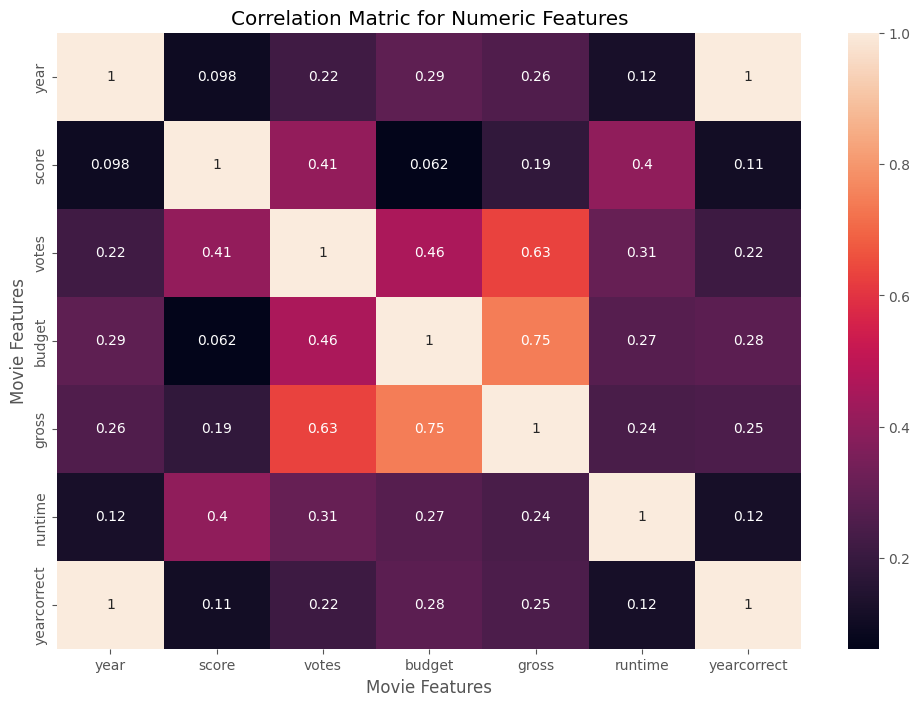

In [86]:
#High Correlation between budget and gross

correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
#Look at Company

#for this we have to comvert company or any object to numeric

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009-12-18,2009
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,2019-04-26,2019
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997-12-19,1997
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,2015-12-18,2015
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200,730,1123,2319,54,20500000,1400,477,103.0,2001-02-09,2001
7625,6720,10,4,2019,1149,5.7,320,2546,2565,1915,55,20500000,790,2309,104.0,2019-01-11,2019
7580,4664,3,5,2019,1835,5.2,735,1445,2203,2278,55,20500000,682,1992,93.0,2020-06-26,2020
2417,3406,10,6,1993,85,7.3,5100,33,1718,2563,27,11900000,596,796,134.0,1993-04-17,1993


In [120]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_clean,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0,2001-02-09,2001
7625,The Untold Story,Unknown,Comedy,2019,"January 11, 2019 (United States)",5.7,320,Shane Stanley,Lee Stanley,Miko Hughes,United States,20500000,790,Visual Arts Entertainment,104.0,2019-01-11,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0,2020-06-26,2020
2417,Madadayo,Unknown,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993-04-17,1993


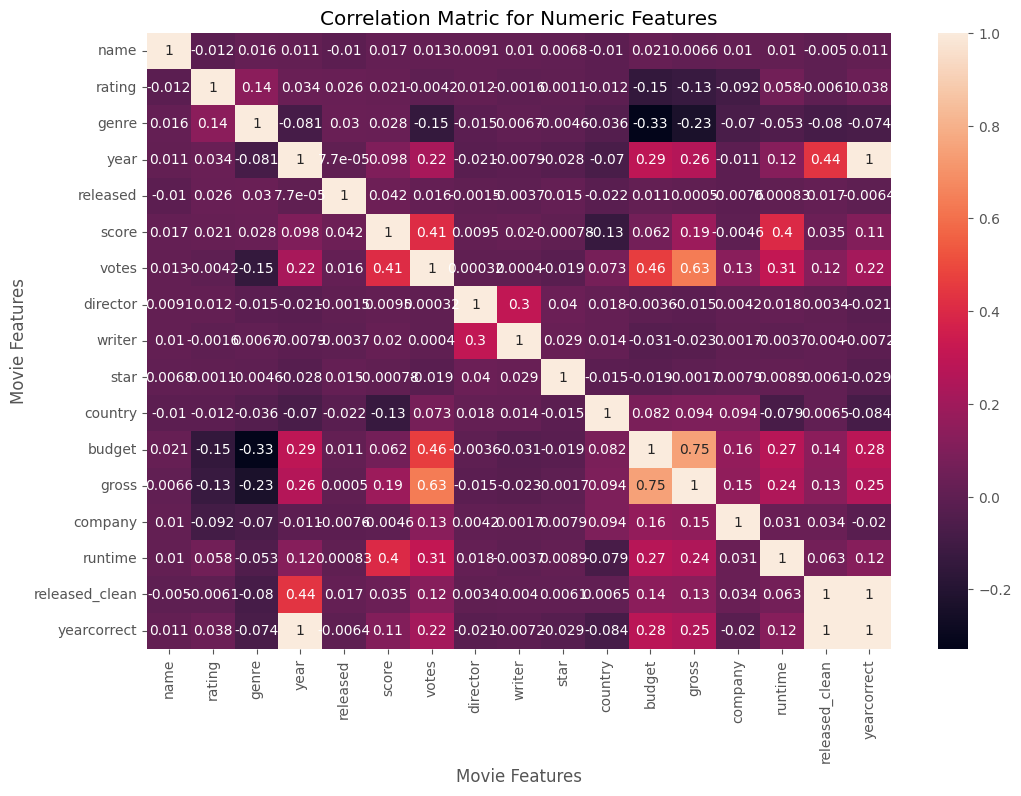

In [121]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [ ]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows',None)
corr_pairs
    

name            name              1.000000
                rating           -0.012206
                genre             0.016355
                year              0.011453
                released         -0.010480
                score             0.017105
                votes             0.013056
                director          0.009079
                writer            0.009985
                star              0.006844
                country          -0.010359
                budget            0.020921
                gross             0.006601
                company           0.010373
                runtime           0.010335
                released_clean   -0.004951
                yearcorrect       0.011431
rating          name             -0.012206
                rating            1.000000
                genre             0.136127
                year              0.033801
                released          0.025526
                score             0.021087
           

In [128]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs



genre           budget           -0.328484
budget          genre            -0.328484
gross           genre            -0.233385
genre           gross            -0.233385
budget          rating           -0.149686
rating          budget           -0.149686
votes           genre            -0.145291
genre           votes            -0.145291
country         score            -0.134427
score           country          -0.134427
rating          gross            -0.130747
gross           rating           -0.130747
company         rating           -0.092284
rating          company          -0.092284
yearcorrect     country          -0.084076
country         yearcorrect      -0.084076
genre           year             -0.081261
year            genre            -0.081261
genre           released_clean   -0.080051
released_clean  genre            -0.080051
country         runtime          -0.079230
runtime         country          -0.079230
genre           yearcorrect      -0.073969
yearcorrect

In [131]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross           votes             0.632120
votes           gross             0.632120
budget          gross             0.745881
gross           budget            0.745881
yearcorrect     year              0.997596
year            yearcorrect       0.997596
yearcorrect     released_clean    0.999668
released_clean  yearcorrect       0.999668
yearcorrect     yearcorrect       1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
released_clean  released_clean    1.000000
rating     

In [ ]:
#Votes and Budget have the highest correlation to gross earnings
#Company has low correlation
